In [1]:
# perform pca to 2 dimensions and visualize data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:

# load data from parquet file
df = pd.read_parquet("../data/final_dataset.parquet")

In [24]:
# perform label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fit and transform the data
le.fit(df["ATTACK"])
df["LABEL"] = le.transform(df["ATTACK"])

In [26]:
data_x = df.iloc[:, :-2]
data_y_strings = df.iloc[:, -2]
data_y = df.iloc[:, -1]

In [42]:
# get counter of classes 
from collections import Counter

count = Counter(data_y_strings)

In [45]:
list(count.keys())

['SSH-Bruteforce',
 'Benign',
 'DDoS attacks-LOIC-HTTP',
 'DDOS attack-HOIC',
 'DoS attacks-Slowloris',
 'DoS attacks-Hulk',
 'FTP-BruteForce',
 'Infilteration',
 'Bot',
 'DoS attacks-GoldenEye',
 'Brute Force -Web',
 'DoS attacks-SlowHTTPTest',
 'SQL Injection',
 'DDOS attack-LOIC-UDP',
 'Brute Force -XSS']

In [43]:
len(count)

15

In [28]:
# create new dataframe by sampling 15 rows from each class in x_train
def sample_rows_per_class(df, class_column, n):
    sampled_data = df.groupby(class_column).apply(lambda x: x.sample(n=n, replace=True) if len(x) >= n else x)
    return sampled_data.reset_index(drop=True)

n = 15

sampled_df = sample_rows_per_class(df, "ATTACK", n)
sampled_df.head()


,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,...,L4_DST_PORT_23,L4_DST_PORT_53,L4_DST_PORT_80,L4_DST_PORT_135,L4_DST_PORT_139,L4_DST_PORT_443,L4_DST_PORT_445,L4_DST_PORT_3389,ATTACK,LABEL
0,1.137065,1.138683,0.153156,-0.875629,0.000000,0.000000,0.684882,0.680894,0.823403,3.713572,...,0,0,0,0,0,1,0,0,Benign,0
1,-0.430556,-0.416913,0.194945,-0.875629,0.000000,0.000000,0.684882,0.680894,-0.129513,3.713572,...,0,0,0,0,0,1,0,0,Benign,0
2,-1.423419,-1.413031,-1.845254,-0.875629,0.000000,0.000000,-2.232845,-2.235903,-1.905773,3.713572,...,0,0,0,0,0,0,0,0,Benign,0
3,1.137065,1.138683,1.977178,-0.875629,0.000000,0.000000,0.000103,-0.002927,0.375730,3.713572,...,0,0,0,0,0,0,0,1,Benign,0
4,1.124009,1.125790,0.194945,1.142044,2.833213,2.833213,0.684882,0.680894,0.875077,3.713572,...,0,0,0,0,0,1,0,0,Benign,0


In [29]:
sampled_df_x = sampled_df.iloc[:, :-2]
sampled_df_y = sampled_df.iloc[:, -1]
sampled_df_y_strings = sampled_df.iloc[:, -2]

In [55]:
# function to perform pca
def pca(X, n_components):
    # perform scaling on x
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # perform pca
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # return pca
    return X_pca

# function to plot pca
def plot_pca(X_pca, class_labels, n_components):
    # plot pca

    # colour map
    class_colors = {
    'SSH-Bruteforce': 'red',
    'Benign': 'blue',
    'DDoS attacks-LOIC-HTTP': 'green',
    'DDOS attack-HOIC': 'orange',
    'DoS attacks-Slowloris': 'purple',
    'DoS attacks-Hulk': 'brown',
    'FTP-BruteForce': 'pink',
    'Infilteration': 'gray',
    'Bot': 'cyan',
    'DoS attacks-GoldenEye': 'magenta',
    'Brute Force -Web': 'yellow',
    'DoS attacks-SlowHTTPTest': 'teal',
    'SQL Injection': 'lime',
    'DDOS attack-LOIC-UDP': 'salmon',
    'Brute Force -XSS': 'olive'
    }

    # colours 
    colors = [class_colors[label] for label in class_labels]

    # set up plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA with {} components'.format(n_components))
    
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


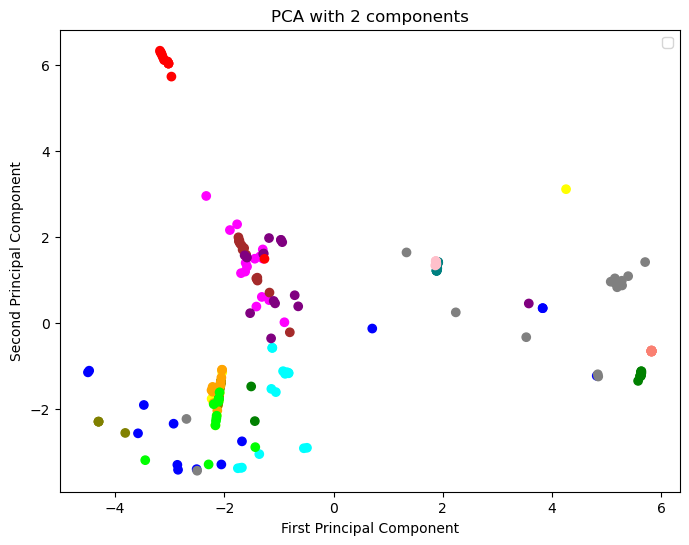

In [56]:
x_pca = pca(sampled_df_x, 2)
# plot pca
plot_pca(x_pca, sampled_df_y_strings, 2)

In [63]:
x_pca.shape

(225, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


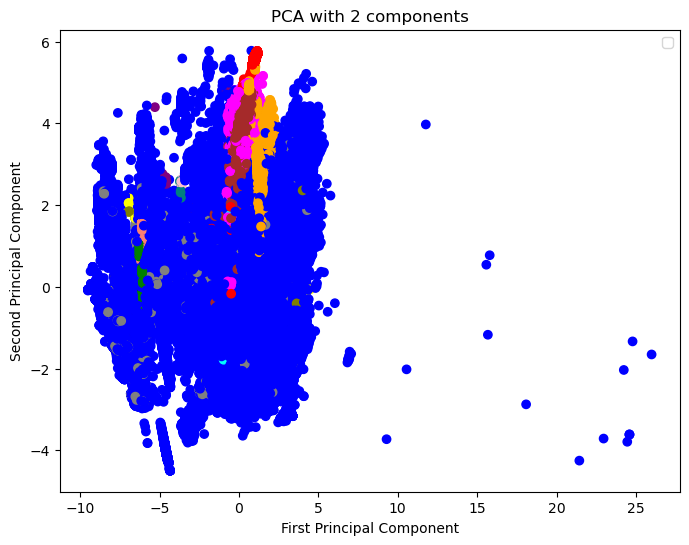

In [58]:
full_pca = pca(data_x, 2)

# plot pca
plot_pca(full_pca, data_y_strings, 2)

In [61]:
# save dataframe to parquet
df.to_parquet('../data/correctly_labeled.parquet')